In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
data1 = pd.read_csv("accidents_2005_to_2007.csv")
data2 = pd.read_csv("accidents_2009_to_2011.csv")
data3 = pd.read_csv("accidents_2012_to_2014.csv")

In [60]:
data = pd.concat([data1,data2,data3])
data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1.0,2.0,1.0,1.0,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1.0,Yes,E01002849,2005.0
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1.0,3.0,1.0,1.0,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002909,2005.0
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1.0,3.0,2.0,1.0,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002857,2005.0
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1.0,3.0,1.0,1.0,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,E01002840,2005.0
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1.0,3.0,1.0,1.0,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1.0,Yes,E01002863,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68523,201206J068021,391813.0,391989.0,-2.124676,53.424620,6.0,3.0,1.0,1.0,15/12/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,2.0,Yes,E01005744,2012.0
68524,201206J068186,386896.0,386968.0,-2.198460,53.379388,6.0,3.0,2.0,1.0,19/12/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1.0,Yes,E01005784,2012.0
68525,201206J068276,389587.0,390377.0,-2.158120,53.410090,6.0,3.0,1.0,1.0,25/12/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1.0,Yes,E01005758,2012.0
68526,201206J068488,389688.0,390245.0,-2.156596,53.408906,6.0,3.0,2.0,3.0,14/12/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1.0,No,E01005758,2012.0


In [5]:
data.shape

(195157, 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195157 entries, 0 to 68527
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               195157 non-null  object 
 1   Location_Easting_OSGR                        195138 non-null  float64
 2   Location_Northing_OSGR                       195138 non-null  float64
 3   Longitude                                    195137 non-null  float64
 4   Latitude                                     195137 non-null  float64
 5   Police_Force                                 195156 non-null  float64
 6   Accident_Severity                            195156 non-null  float64
 7   Number_of_Vehicles                           195156 non-null  float64
 8   Number_of_Casualties                         195156 non-null  float64
 9   Date                                         195156 non-null

"Number_of_Vehicles" ve "Number_of_Casualties" verileri arasındaki ilişkiyi ve haftanın günlerine göre nasıl değiştiğini çubuk grafiğiyle görelim:

<ipython-input-17-eee0c3869acc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grup = data.groupby('Year')['Number_of_Vehicles', 'Number_of_Casualties'].sum()


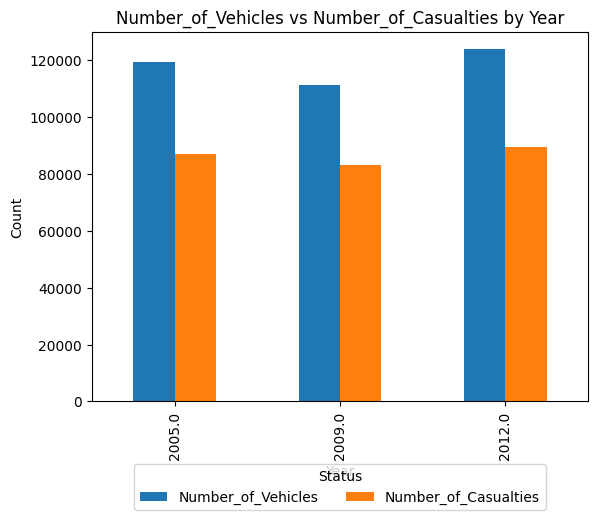

In [17]:
grup = data.groupby('Day_of_Week')['Number_of_Vehicles', 'Number_of_Casualties'].sum()

# Çubuk grafiği
grup.plot(kind='bar')
plt.xlabel('Day_of_Week')
plt.ylabel('Count')
plt.title('Number_of_Vehicles vs Number_of_Casualties by Day_of_Week')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(grup))
plt.show()


Grafiktende anlaşılacağı gibi trafiğe en çok aracın çıktığı gün haftanın 7. günü olan cumartesi günüdür ve bununla ilişkili olarak en çok kaybın olduğu günde aynıdır.

Aynısını 'Year' verisi için yaparsak:

<ipython-input-20-eee0c3869acc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grup = data.groupby('Year')['Number_of_Vehicles', 'Number_of_Casualties'].sum()


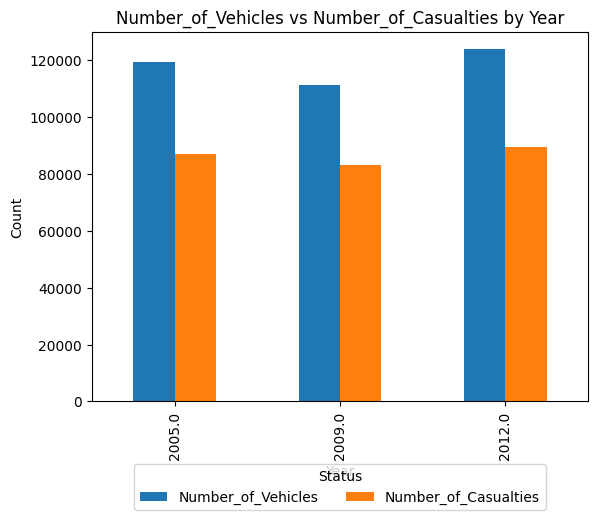

In [20]:
grup = data.groupby('Year')['Number_of_Vehicles', 'Number_of_Casualties'].sum()

# Çubuk grafiği
grup.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number_of_Vehicles vs Number_of_Casualties by Year')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(grup))
plt.show()

Şimdi de araç ve

In [36]:
# Saatleri datetime formatına dönüştürelim
data['Time'] = pd.to_datetime(data['Time'])

# Saatleri belli aralıklara bölelim karışık bir grafik olmaması için
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Sabah'
    elif 12 <= hour < 17:
        return 'Öğlen'
    elif 17 <= hour < 23:
        return 'Akşam'
    else:
        return 'Gece'

# "Time" sütununu saat kısmını kullanarak kategorilere bölelim
data['Time_Category'] = data['Time'].dt.hour.apply(categorize_time)

# Gruplanmış verileri inceleyelim
grup = data.groupby('Time_Category')[['Number_of_Vehicles', 'Number_of_Casualties']].sum()
print(grup)

               Number_of_Vehicles  Number_of_Casualties
Time_Category                                          
Akşam                    112468.0               82453.0
Gece                      25284.0               21802.0
Sabah                     96503.0               66441.0
Öğlen                    120564.0               88948.0


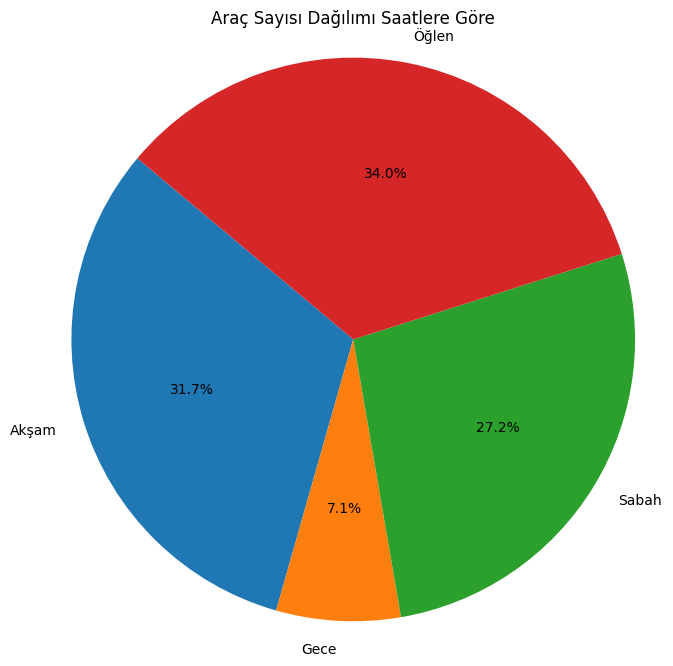

In [37]:
#Araç Sayısı Dağılımı Saatlere Göre
plt.figure(figsize=(8, 8))
plt.pie(grup['Number_of_Vehicles'], labels=grup.index, autopct='%1.1f%%', startangle=140)
plt.title('Araç Sayısı Dağılımı Saatlere Göre')
plt.axis('equal')  # Pasta grafiğinin yuvarlak olmasını sağlar
plt.show()

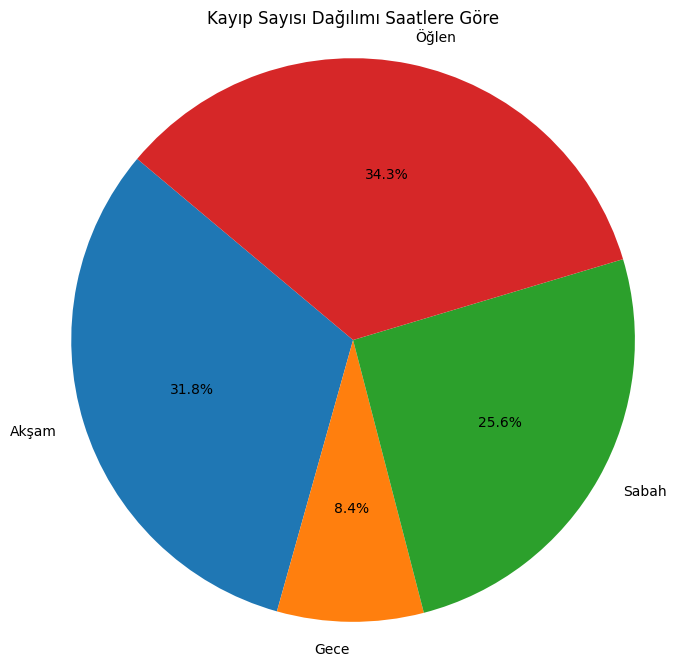

In [38]:
#Kayıp Sayısı Dağılımı Saatlere Göre
plt.figure(figsize=(8, 8))
plt.pie(grup['Number_of_Casualties'], labels=grup.index, autopct='%1.1f%%', startangle=140)
plt.title('Kayıp Sayısı Dağılımı Saatlere Göre')
plt.axis('equal')  # Pasta grafiğinin yuvarlak olmasını sağlar
plt.show()

<ipython-input-46-f991ae34019a>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grup = data.groupby('Weather_Conditions')['Number_of_Vehicles', 'Number_of_Casualties'].sum()


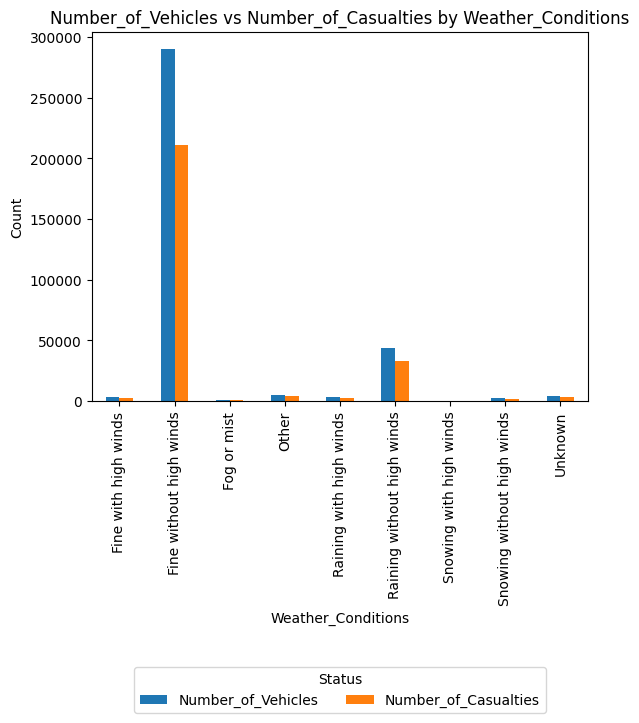

In [46]:
# Hava koşullarına göre trafik ve kayıp

grup = data.groupby('Weather_Conditions')['Number_of_Vehicles', 'Number_of_Casualties'].sum()

# Çubuk grafiği
grup.plot(kind='bar')
plt.xlabel('Weather_Conditions')
plt.ylabel('Count')
plt.title('Number_of_Vehicles vs Number_of_Casualties by Weather_Conditions')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(0.5, -0.70), ncol=len(grup))
plt.show()

Genel olarak grafiklere bakınca havanın rüzgarlı olduğu, öğlen saatlerinde ve daha çok cumartesi günleri trafik ve kayıp oranları daha yüksektir.

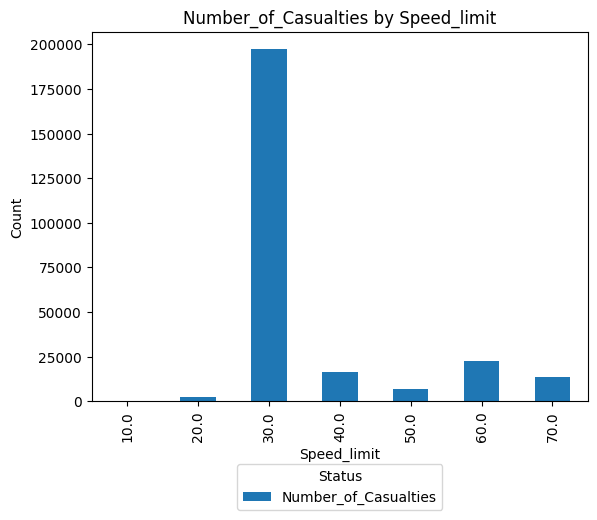

In [47]:
grup = data.groupby('Speed_limit')['Number_of_Casualties'].sum()

# Çubuk grafiği
grup.plot(kind='bar')
plt.xlabel('Speed_limit')
plt.ylabel('Count')
plt.title('Number_of_Casualties by Speed_limit')
plt.legend(title='Status', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(grup))
plt.show()

<ipython-input-77-1c119493abba>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-ticks")


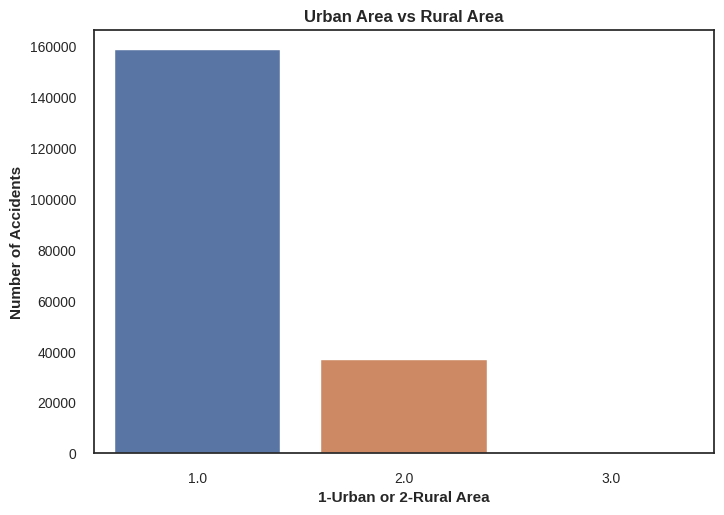

In [77]:
#Urban_or_Rural_Area
data["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-ticks")

sns.countplot(x="Urban_or_Rural_Area",data=data)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("1-Urban or 2-Rural Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")

plt.show()

Kentsel bölgede kırsal bölgeye oranla daha çok kaza görülmektedir

Eldeki verilere dayanarak, öğlen saatlerinde, özellikle cumartesi günlerinde ve kentsel bölgelerde meydana gelen kazaların, trafik yoğunluğunun arttığı zamanlarda gerçekleştiği düşünülebilir. Bu durum, özellikle hafta sonları ve öğlen saatlerinde sürücülerin daha fazla trafiğe maruz kaldığını ve bu yoğunluğun kazaların oluşma ihtimalini artırabileceğini gösterebilir.

Ayrıca, kentsel bölgelerde ve düşük hız limitlerine (30 km/saat) sahip alanlarda meydana gelen kazalar, sürücülerin trafik kurallarına uygun hareket etmediği veya dikkatsiz davrandığı anlamına gelebilir. Bu tür bölgelerde bile kaza riski yüksekse, sürücülerin trafik güvenliği konusunda daha fazla bilinçlendirilmesi ve trafik kurallarına uymaları için önlemler alınması gerekebilir.

Bu durum, trafik yönetimi ve güvenlik önlemlerinin önemini vurgulamaktadır. Özellikle öğlen saatlerinde ve cumartesi günlerinde trafik düzenlemelerinin artırılması, hız sınırlarına uyulması ve sürücülerin trafik kurallarına daha dikkatli bir şekilde uyması, kazaların sayısını azaltabilir. Ayrıca, sürücüleri trafik eğitimi ve farkındalık kampanyalarıyla bilinçlendirmek, kazaların nedenlerini anlamak ve önlem almak açısından da önemlidir.

Sonuç olarak, bu tür kazaların meydana geldiği zaman ve yerlere odaklanarak, trafik yönetimi, güvenlik önlemleri, sürücü davranışları ve trafik eğitimi gibi faktörleri değerlendirmek, trafik güvenliğini artırmak ve kazaların önlenmesi için adımlar atmak önemlidir.